# WildFires predictions w/ PyTorch

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

import torch
import torchvision
import torchvision.transforms as transforms

## Import data

To import data, we will create a data loader for the test dataset, the train and the validation ones.

In [2]:
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor

Creating dataframes for validation, test and training

In [3]:
from torchvision.io import read_image

def checkfile(filepath):
    try:
        img = read_image(filepath)
        return True
    except:
        print(f"{filepath} Image could not be read")
        return False

In [4]:
# datapath = '/kaggle/input/wildfire-prediction-dataset'
datapath = 'data'

In [5]:
filenames, annots = [], []
for filename in os.listdir(os.path.join(datapath, 'test', 'nowildfire')):
    if checkfile(os.path.join(datapath, 'test', 'nowildfire', filename)):
        filenames.append(os.path.join('nowildfire', filename))
        annots.append(0)
for filename in os.listdir(os.path.join(datapath, 'test', 'wildfire')):
    if checkfile(os.path.join(datapath, 'test', 'wildfire', filename)):
        filenames.append(os.path.join('wildfire', filename))
        annots.append(1)
df_test = pd.DataFrame(columns=['filename', 'wildfire'])
df_test['filename'] = filenames
df_test['wildfire'] = annots

df_test.shape

data\test\wildfire\-73.15884,46.38819.jpg Image could not be read


(6299, 2)

In [6]:
df_test.sample(3)

,filename,wildfire
1375,"nowildfire\-73.53911,45.629038.jpg",0
4928,"wildfire\-74.83492,47.85042.jpg",1
126,"nowildfire\-113.961713,51.030028.jpg",0


In [7]:
filenames, annots = [], []
for filename in os.listdir(os.path.join(datapath, 'train', 'nowildfire')):
    if checkfile(os.path.join(datapath, 'train', 'nowildfire', filename)):
        filenames.append(os.path.join('nowildfire', filename))
        annots.append(0)
for filename in os.listdir(os.path.join(datapath, 'train', 'wildfire')):
    if checkfile(os.path.join(datapath, 'train', 'wildfire', filename)):
        filenames.append(os.path.join('wildfire', filename))
        annots.append(1)
df_train = pd.DataFrame(columns=['filename', 'wildfire'])
df_train['filename'] = filenames
df_train['wildfire'] = annots

df_train.shape

data\train\nowildfire\-114.152378,51.027198.jpg Image could not be read


(30249, 2)

In [8]:
filenames, annots = [], []
for filename in os.listdir(os.path.join(datapath, 'valid', 'nowildfire')):
    if checkfile(os.path.join(datapath, 'valid', 'nowildfire', filename)):
        filenames.append(os.path.join('nowildfire', filename))
        annots.append(0)
for filename in os.listdir(os.path.join(datapath, 'valid', 'wildfire')):
    if checkfile(os.path.join(datapath, 'valid', 'wildfire', filename)):
        filenames.append(os.path.join('wildfire', filename))
        annots.append(1)
df_val = pd.DataFrame(columns=['filename', 'wildfire'])
df_val['filename'] = filenames
df_val['wildfire'] = annots

df_val.shape

(6300, 2)

### PLOT all fires using locations on a map

In [ ]:
import plotly.graph_objects as go

full_df = pd.concat([df_test, df_train, df_val], axis=0)
# full_df = full_df[full_df['wildfire'] == 1]

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
# df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)
full_df['long'] = full_df['filename'].apply(lambda x: x.replace('.jpg', '').split('\\')[-1].split(',')[0])
full_df['lat'] = full_df['filename'].apply(lambda x: x.replace('.jpg', '').split("\\")[-1].split(',')[1])

fig = go.Figure(data=go.Scattergeo(
        lon = full_df['long'],
        lat = full_df['lat'],
#         text = df['text'],
        mode = 'markers',
        marker_color = full_df['wildfire'],
        ))

fig.update_layout(
        title = 'Wildfires in Canada',
        geo_scope='north america',
    )
fig.show()

In [ ]:
full_df.sample()

Creating a custom dataset class

In [9]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
#         self.img_labels = pd.read_csv(annotations_file)
        self.img_labels = annotations_file
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        image = image.float()
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [10]:
transform = transforms.Compose([
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.Resize((350, 350))
])

test_data = CustomImageDataset(df_test, os.path.join(datapath, 'test'), transform=transform)
training_data = CustomImageDataset(df_train, os.path.join(datapath, 'train'), transform=transform)
val_data = CustomImageDataset(df_val, os.path.join(datapath, 'valid'), transform=transform)

In [11]:
test_data[500]

c:\users\maxim\onedrive\documents\github\prevent_forest_fires\venv\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


(tensor([[[201., 197., 203.,  ..., 289., 287., 281.],
          [179., 181., 187.,  ..., 291., 291., 285.],
          [159., 165., 185.,  ..., 239., 245., 237.],
          ...,
          [289., 279., 305.,  ..., 295., 251., 247.],
          [219., 223., 253.,  ..., 273., 233., 225.],
          [133., 149., 169.,  ..., 271., 253., 243.]],
 
         [[205., 201., 207.,  ..., 285., 287., 285.],
          [183., 185., 191.,  ..., 293., 295., 291.],
          [163., 169., 193.,  ..., 245., 251., 247.],
          ...,
          [305., 295., 321.,  ..., 293., 249., 241.],
          [235., 239., 269.,  ..., 267., 227., 219.],
          [149., 165., 187.,  ..., 265., 247., 233.]],
 
         [[203., 199., 205.,  ..., 261., 263., 259.],
          [181., 183., 189.,  ..., 265., 267., 257.],
          [161., 167., 191.,  ..., 207., 209., 203.],
          ...,
          [279., 269., 291.,  ..., 257., 213., 203.],
          [209., 209., 239.,  ..., 233., 189., 181.],
          [119., 135., 153.,  .

### Prepare the data for training with DataLoaders

In [12]:
from torch.utils.data import DataLoader

test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=64, shuffle=True)

> Iterate through the DataLoader

Feature batch shape: torch.Size([64, 3, 350, 350])
Labels batch shape: torch.Size([64])


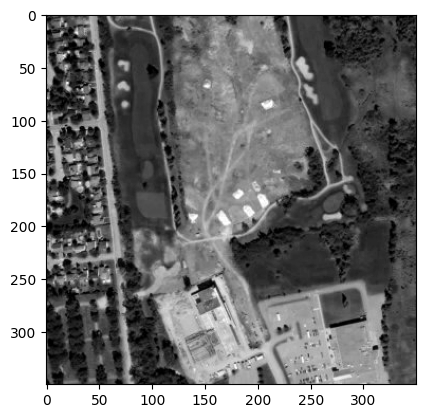

Label: 0


In [13]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0][0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [14]:
classes = ('no wildfire', 'wildfire')

## Define a Convolutional Neural Network

In [15]:
import torch.nn as nn
import torch.nn.functional as F


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 87 * 87, 128)
        self.fc2 = nn.Linear(128, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 32 * 87 * 87)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Define a Loss function and optimizer

### Train the network

In [16]:
def train(model, train_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 100))
                running_loss = 0.0

In [ ]:
import torch.optim as optim

model = CNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)#, momentum=0.9)

train(model, train_dataloader, criterion, optimizer, epochs=2)

[1,   100] loss: nan
[1,   200] loss: nan


In [51]:
count = 0
for i, data in enumerate(test_dataloader, 0):
    print(data)
    count+=i
print(count, len(test_dataloader))

[tensor([[[[125.,  71., 107.,  ..., 109., 113., 131.],
          [119.,  59.,  95.,  ..., 145., 135., 137.],
          [137.,  59.,  83.,  ..., 139., 151., 135.],
          ...,
          [137., 123., 115.,  ..., 165., 175., 177.],
          [133., 125., 137.,  ..., 171., 169., 165.],
          [125., 123., 147.,  ..., 169., 157., 147.]],

         [[163., 109., 145.,  ..., 155., 163., 185.],
          [157.,  97., 133.,  ..., 191., 185., 191.],
          [173.,  95., 119.,  ..., 179., 197., 185.],
          ...,
          [141., 127., 119.,  ..., 169., 179., 181.],
          [137., 129., 141.,  ..., 175., 173., 169.],
          [129., 127., 151.,  ..., 173., 161., 151.]],

         [[107.,  53.,  89.,  ...,  97.,  99., 119.],
          [101.,  41.,  77.,  ..., 133., 125., 125.],
          [121.,  43.,  67.,  ..., 123., 139., 125.],
          ...,
          [135., 121., 113.,  ..., 147., 157., 159.],
          [127., 119., 135.,  ..., 153., 151., 147.],
          [119., 117., 141.,  ..

[tensor([[[[145., 139.,  83.,  ..., 195.,  87.,  21.],
          [201., 161.,  67.,  ..., 119.,  33.,   9.],
          [259., 185.,  53.,  ...,  97.,  31.,  19.],
          ...,
          [217., 235., 237.,  ...,  75.,  75.,  81.],
          [259., 287., 305.,  ...,  73.,  77.,  67.],
          [137., 167., 205.,  ...,  71.,  83.,  79.]],

         [[195., 187., 131.,  ..., 223., 119.,  61.],
          [247., 207., 113.,  ..., 147.,  65.,  49.],
          [301., 227.,  95.,  ..., 125.,  63.,  59.],
          ...,
          [249., 267., 267.,  ..., 107., 109., 117.],
          [291., 319., 337.,  ..., 105., 111., 109.],
          [169., 199., 237.,  ..., 109., 123., 121.]],

         [[137., 135.,  79.,  ..., 189.,  97.,  39.],
          [207., 167.,  73.,  ..., 113.,  39.,  27.],
          [283., 209.,  77.,  ...,  91.,  37.,  37.],
          ...,
          [195., 209., 209.,  ..., 105.,  93.,  93.],
          [233., 261., 279.,  ...,  99.,  95.,  79.],
          [111., 141., 179.,  ..

[tensor([[[[ 45.,  67., 249.,  ..., 193., 217., 151.],
          [ 57., 107., 355.,  ..., 215., 175., 105.],
          [ 93., 153., 385.,  ..., 253., 155.,  71.],
          ...,
          [109.,  85.,  91.,  ...,  21.,  15.,  39.],
          [105., 119., 101.,  ...,  23.,  27.,  41.],
          [ 97., 113., 129.,  ...,  23.,  37.,  43.]],

         [[ 39.,  61., 243.,  ..., 189., 213., 149.],
          [ 53., 103., 351.,  ..., 211., 171., 103.],
          [ 93., 153., 387.,  ..., 249., 149.,  69.],
          ...,
          [117.,  93., 105.,  ...,  55.,  49.,  73.],
          [113., 133., 119.,  ...,  57.,  61.,  77.],
          [111., 127., 147.,  ...,  57.,  73.,  79.]],

         [[  5.,  27., 209.,  ..., 143., 171., 109.],
          [ 23.,  73., 321.,  ..., 169., 129.,  63.],
          [ 69., 129., 359.,  ..., 207., 111.,  29.],
          ...,
          [ 87.,  59.,  69.,  ...,  19.,  11.,  35.],
          [ 79.,  97.,  81.,  ...,  19.,  23.,  33.],
          [ 75.,  91., 109.,  ..

[tensor([[[[ 31.,  31.,  31.,  ..., 197., 185., 179.],
          [ 31.,  31.,  31.,  ..., 193., 189., 189.],
          [ 31.,  31.,  31.,  ..., 177., 183., 187.],
          ...,
          [197., 203., 191.,  ..., 139., 133., 129.],
          [201., 205., 189.,  ..., 129., 131., 133.],
          [211., 211., 193.,  ..., 119., 131., 133.]],

         [[ 57.,  57.,  57.,  ..., 211., 199., 193.],
          [ 57.,  57.,  57.,  ..., 207., 203., 203.],
          [ 57.,  57.,  57.,  ..., 195., 197., 201.],
          ...,
          [217., 223., 211.,  ..., 173., 167., 163.],
          [221., 225., 209.,  ..., 163., 165., 167.],
          [231., 231., 213.,  ..., 153., 165., 167.]],

         [[ 43.,  43.,  43.,  ..., 149., 137., 131.],
          [ 43.,  43.,  43.,  ..., 145., 141., 141.],
          [ 43.,  43.,  43.,  ..., 133., 135., 139.],
          ...,
          [149., 155., 143.,  ..., 105.,  99.,  95.],
          [153., 157., 141.,  ...,  95.,  97.,  99.],
          [163., 163., 145.,  ..

KeyboardInterrupt: 

In [67]:
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

In [34]:
net.load_state_dict(torch.load('./backend/net.pth'))

RuntimeError: Error(s) in loading state_dict for Net:
	size mismatch for fc1.weight: copying a param with shape torch.Size([64, 22707]) from checkpoint, the shape in current model is torch.Size([3, 7569]).
	size mismatch for fc1.bias: copying a param with shape torch.Size([64]) from checkpoint, the shape in current model is torch.Size([3]).
	size mismatch for fc2.weight: copying a param with shape torch.Size([32, 64]) from checkpoint, the shape in current model is torch.Size([2, 3]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([32]) from checkpoint, the shape in current model is torch.Size([2]).
	size mismatch for fc3.weight: copying a param with shape torch.Size([2, 32]) from checkpoint, the shape in current model is torch.Size([2, 2]).

## Test the network on the test data

In [19]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


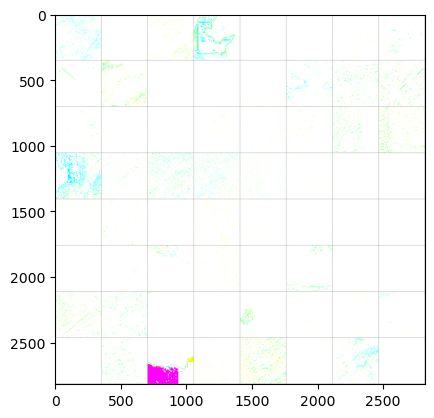

GroundTruth:  wildfire wildfire wildfire wildfire


In [20]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)

# Print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [21]:
outputs = net(images)
outputs

tensor([[-2.4556,  0.6180],
        [-0.7765, -0.3179],
        [ 0.1969, -1.2671],
        [-2.3835,  0.6395],
        [ 2.2337, -3.0839],
        [ 2.7703, -4.2112],
        [-2.1004,  0.3735],
        [ 1.8571, -3.0836],
        [ 0.1184, -1.0663],
        [-2.5364,  0.6709],
        [ 3.7837, -5.4843],
        [-1.9288,  0.3770],
        [-2.1174,  0.4224],
        [-2.3280,  0.6639],
        [ 1.0748, -2.1239],
        [ 0.8829, -2.3591],
        [ 2.6030, -3.7219],
        [-2.4000,  0.5997],
        [ 0.3994, -1.5321],
        [ 2.3038, -3.3778],
        [-2.4360,  0.7190],
        [ 2.4003, -3.5978],
        [-2.5794,  0.6336],
        [ 1.1009, -2.3536],
        [-0.8340, -0.4967],
        [ 1.7918, -2.9685],
        [-2.3996,  0.6190],
        [-2.2572,  0.5476],
        [-2.6485,  0.6764],
        [-2.4865,  0.6533],
        [-2.2731,  0.6025],
        [-0.8019, -0.1425],
        [ 2.0165, -3.4205],
        [ 0.5460, -1.4721],
        [ 1.1866, -2.3049],
        [-1.7897,  0

In [22]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  wildfire wildfire no wildfire wildfire


Let us look at how the network performs on the whole dataset.

In [23]:
correct = 0
total = 0

# We're not training, we do not need to calculate the gradients
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the test images: {100 * correct // total} %")

Accuracy of the network on the test images: 90 %


In [28]:
len(images)

26

In [32]:
with torch.no_grad():
    net.eval()
    image_path = './backend/sample_image.jpg'
    # image = read_image(image_path)
    # image = image.float()
    image = images[0]
    outputs = net(image)
    _, predicted = torch.max(outputs.data, 1)
    predicted

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x7569 and 22707x64)